In [365]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [366]:
def System(r,t,beta,gamma):
    
    dsdt = -beta*r[0]*r[1]
    didt =  beta*r[0]*r[1] - gamma*r[1]
    
    return [dsdt,didt]

In [367]:
def f0(S,I,beta,gamma):
    return -beta*S*I

def f1(S,I,beta,gamma):
    return beta*S*I - gamma*I

In [368]:
beta = 0.002
gamma = 0.5
t = np.linspace(0,30,100)

In [369]:
r0 = [1000,1]
r = integrate.odeint( System, r0, t, args=(beta,gamma) )

In [370]:
def Integrator2(f0,f1,r0,t):
    
    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+h*K1[0],I[i-1]+h*K1[1],beta,gamma)
        
        S[i] = S[i-1] + 0.5*h*(K1[0]+K2[0])
        I[i] = I[i-1] + 0.5*h*(K1[1]+K2[1])
        
    return S,I

In [371]:
def Integrator3(f0,f1,r0,t):

    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+0.5*h*K1[0],I[i-1]+0.5*h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+0.5*h*K1[0],I[i-1]+0.5*h*K1[1],beta,gamma)
        

        K3[0] = f0(S[i-1]-h*K1[0]+2*h*K2[0],I[i-1]-h*K1[1]+2*h*K2[1],beta,gamma)
        K3[1] = f1(S[i-1]-h*K1[0]+2*h*K2[0],I[i-1]-h*K1[1]+2*h*K2[1],beta,gamma)

        S[i] = S[i-1] + (1/6)*h*(K1[0]+4*K2[0]+K3[0])
        I[i] = I[i-1] + (1/6)*h*(K1[1]+4*K2[1]+K3[1])
    return S,I
        

In [372]:
def Integrator4(f0,f1,r0,t):

    h = t[1] - t[0]
    
    S = np.zeros_like(t)
    I = np.zeros_like(t)
    
    # Initial condition
    S[0] =r0[0]
    I[0] =r0[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    K3 = np.zeros(2)
    K4 = np.zeros(2)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(S[i-1],I[i-1],beta,gamma)
        K1[1] = f1(S[i-1],I[i-1],beta,gamma)
        
        K2[0] = f0(S[i-1]+0.5*h*K1[0],I[i-1]+0.5*h*K1[1],beta,gamma)
        K2[1] = f1(S[i-1]+0.5*h*K1[0],I[i-1]+0.5*h*K1[1],beta,gamma)
        
        K3[0] = f0(S[i-1]+0.5*h*K2[0],I[i-1]+0.5*h*K2[1],beta,gamma)
        K3[1] = f1(S[i-1]+0.5*h*K2[0],I[i-1]+0.5*h*K2[1],beta,gamma)

        K4[0] = f0(S[i-1]+h*K3[0],I[i-1]+h*K3[1],beta,gamma)
        K4[1] = f1(S[i-1]+h*K3[0],I[i-1]+h*K3[1],beta,gamma)

        S[i] = S[i-1] + (1/6)*h*(K1[0]+2*K2[0]+2*K3[0]+K4[0])
        I[i] = I[i-1] + (1/6)*h*(K1[1]+2*K2[1]+2*K3[1]+K4[1])
    return S,I

In [373]:
#S2,I2 = Integrator2(f0,f1,r0,t)
S3,I3 = Integrator3(f0,f1,r0,t)
S4,I4 = Integrator4(f0,f1,r0,t)

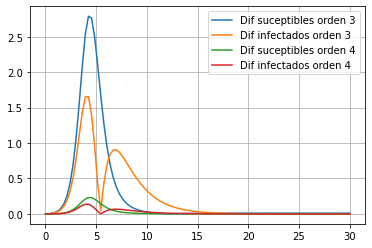

In [374]:
plt.plot(t,np.abs(r[:,0]-S3),label='Dif suceptibles orden 3')
plt.plot(t,np.abs(r[:,1]-I3),label='Dif infectados orden 3')
plt.plot(t,np.abs(r[:,0]-S4),label='Dif suceptibles orden 4')
plt.plot(t,np.abs(r[:,1]-I4),label='Dif infectados orden 4')
plt.legend()
plt.grid()

In [375]:
def fc(z):
    return 1j*z

In [376]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)

In [377]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)

In [378]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4 = fc(f+h_*k3)
    
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)

In [379]:
theta = 0.

N = 100
Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

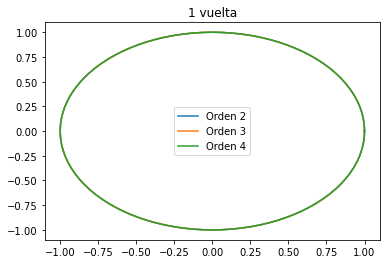

In [382]:
Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])
Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])
Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])
plt.plot(Re2,Im2,label='Orden 2')
plt.plot(Re3,Im3,label='Orden 3')
plt.plot(Re4,Im4,label='Orden 4')
plt.title('1 vuelta')
plt.legend()

In [383]:
theta = 0.

N = 100
Vueltas = 6

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

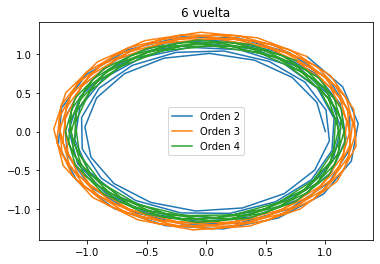

In [385]:
Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])
Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])
Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])
plt.plot(Re2,Im2,label='Orden 2')
plt.plot(Re3,Im3,label='Orden 3')
plt.plot(Re4,Im4,label='Orden 4')
plt.title('6 vuelta')
plt.legend()

Se observa que a medida que aumenta el numero de vueltas, se pone más en evidencia la inestabilidadde las soluciones de Runge-Kutta. No obstante, se observa que la solución de orden 4 es un poco más estable que la de orden 3